# Rossmann store sales

## Import necessary Libraries & data file

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
sales = pd.read_csv('./train.csv/train.csv')

In [4]:
# Check the data info  
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
Store            1017209 non-null int64
DayOfWeek        1017209 non-null int64
Date             1017209 non-null object
Sales            1017209 non-null int64
Customers        1017209 non-null int64
Open             1017209 non-null int64
Promo            1017209 non-null int64
StateHoliday     1017209 non-null object
SchoolHoliday    1017209 non-null int64
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


#### from the above, The data set has 9 columns and 10177209 entries. It seems no any data's missing from the each columns. However, let check for null values, for to be sure on it

In [5]:
sales.isnull().any()

Store            False
DayOfWeek        False
Date             False
Sales            False
Customers        False
Open             False
Promo            False
StateHoliday     False
SchoolHoliday    False
dtype: bool

#### So, its confirmed that there were no any null values present in the data set.

#### lets view first 5 row headers of the data

In [6]:
sales.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [7]:
# This is time sereis data set. So, the datatype of 'Date' columns has to be changed from object to datetime 64 type.
sales['Date'] = pd.to_datetime(sales['Date'])

In [8]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
Store            1017209 non-null int64
DayOfWeek        1017209 non-null int64
Date             1017209 non-null datetime64[ns]
Sales            1017209 non-null int64
Customers        1017209 non-null int64
Open             1017209 non-null int64
Promo            1017209 non-null int64
StateHoliday     1017209 non-null object
SchoolHoliday    1017209 non-null int64
dtypes: datetime64[ns](1), int64(7), object(1)
memory usage: 69.8+ MB


In [9]:
#check for 2 or more sales entries for each date
sales['Date'].nunique()

942

In [13]:
sales.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,1017209.0,558.429727,321.908651,1.0,280.0,558.0,838.0,1115.0
DayOfWeek,1017209.0,3.998341,1.997391,1.0,2.0,4.0,6.0,7.0
Sales,1017209.0,5773.818972,3849.926175,0.0,3727.0,5744.0,7856.0,41551.0
Customers,1017209.0,633.145946,464.411734,0.0,405.0,609.0,837.0,7388.0
Open,1017209.0,0.830107,0.375539,0.0,1.0,1.0,1.0,1.0
Promo,1017209.0,0.381515,0.485759,0.0,0.0,0.0,1.0,1.0
SchoolHoliday,1017209.0,0.178647,0.383056,0.0,0.0,0.0,0.0,1.0


In [15]:
sales[sales['Sales']<=0]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
291,292,5,2015-07-31,0,0,0,1,0,1
875,876,5,2015-07-31,0,0,0,1,0,1
1406,292,4,2015-07-30,0,0,0,1,0,1
1990,876,4,2015-07-30,0,0,0,1,0,1
2521,292,3,2015-07-29,0,0,0,1,0,1
3105,876,3,2015-07-29,0,0,0,1,0,1
3636,292,2,2015-07-28,0,0,0,1,0,1
4220,876,2,2015-07-28,0,0,0,1,0,1
4751,292,1,2015-07-27,0,0,0,1,0,1
5335,876,1,2015-07-27,0,0,0,1,0,1


In [16]:
# now has to set the date columns as index of this data and then sort the values
sales = sales.set_index('Date')
sales = sales.sort_index()

In [18]:
#group the data's and sum & store it in new dataframe
sales_m = sales.groupby(pd.Grouper(freq='M')).sum()

In [19]:
sales_m.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
Date,,,,,,,
2013-01-31,19286282,134913,180132207,20380423,28869,11150,5115
2013-02-28,17420760,124880,171534275,19244468,26683,11150,2676
2013-03-31,19287270,144950,201180369,21969462,27892,16725,5689
2013-04-30,18665100,128225,183431432,20882365,27880,13380,5319
2013-05-31,19287270,138260,185411063,20723886,26202,14495,3774


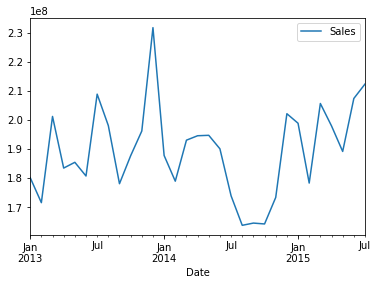

In [21]:
#let's plot the graph for Sales
sales_m.plot(y='Sales');

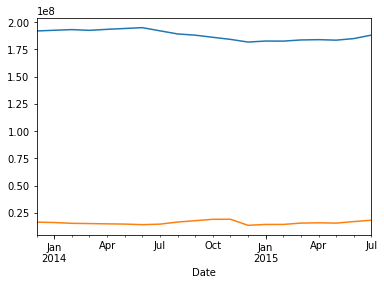

In [22]:
ax = sales_m['Sales'].rolling(12).mean().dropna().plot()
sales_m['Sales'].rolling(12).std().dropna().plot(ax = ax);

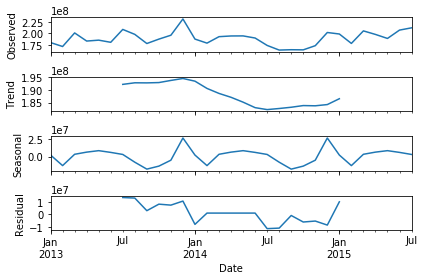

In [23]:
# Import seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose
# Your code here

# Decompose item_cnt_day with freq=12, model='additive'
res = seasonal_decompose(sales_m['Sales'])
fig = res.plot();

In [24]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [25]:
test_stationarity(sales_m['Sales'])

Results of Dickey-Fuller Test:
Test Statistic                 -3.544365
p-value                         0.006918
#Lags Used                      0.000000
Number of Observations Used    30.000000
Critical Value (1%)            -3.669920
Critical Value (5%)            -2.964071
Critical Value (10%)           -2.621171
dtype: float64


In [26]:
test_stationarity(sales_m['Sales'].diff(12).dropna())

Results of Dickey-Fuller Test:
Test Statistic                  0.000000
p-value                         0.958532
#Lags Used                      8.000000
Number of Observations Used    10.000000
Critical Value (1%)            -4.331573
Critical Value (5%)            -3.232950
Critical Value (10%)           -2.748700
dtype: float64


/Users/macos/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1510: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


In [27]:
ts = sales_m['Sales'].diff(12).diff(1).dropna()

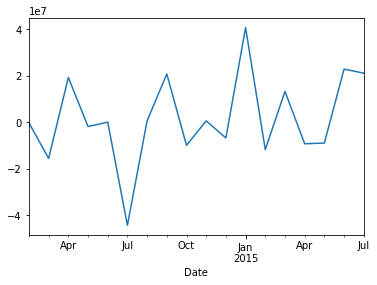

In [28]:
ts.plot()

In [29]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

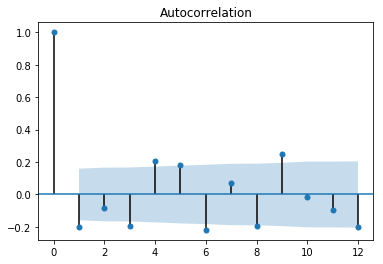

In [30]:
# Plot autocorrelation of ts with lags=12, alpha=0.5
plot_acf(ts, lags=12, alpha=0.5);

/Users/macos/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


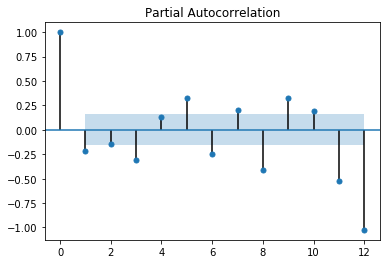

In [31]:
# Plot Partial Autocorrelation of ts with lags=12, alpha=0.5
# Your code here
plot_pacf(ts, lags=12, alpha=0.5);

In [32]:
from statsmodels.tsa.arima_model import ARMA

best_aic = np.inf
best_order = None
best_model = None

rng = range(5)
for i in rng:
    for j in rng:
        if i == j == 0:
            continue
        try:
            # Create and train ARMA model with order=(i, j)
            model = ARMA(ts, order=(i, j)).fit()
            aic = model.aic
            if aic < best_aic:
                best_aic = aic
                best_order = (i, j)
                best_model = model
        except: continue
print('AIC: {:6.5} | order: {}'.format(best_aic, best_order))

/Users/macos/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/macos/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/macos/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:607: RuntimeWarning: invalid value encountered in true_divide
  (1+np.exp(-params))).copy()
/Users/macos/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:609: RuntimeWarning: invalid value encountered in true_divide
  (1+np.exp(-params))).copy()
/Users/macos/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/macos/anaconda3/lib/python3.7/site-pack

AIC: 658.41 | order: (0, 1)


/Users/macos/anaconda3/lib/python3.7/site-packages/statsmodels/tools/numdiff.py:243: RuntimeWarning: invalid value encountered in multiply
  **kwargs)).imag/2./hess[i, j]
/Users/macos/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [33]:
predict = ARMA(ts, order=(5, 1)).fit().predict(start=0, end=25)

/Users/macos/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:320: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


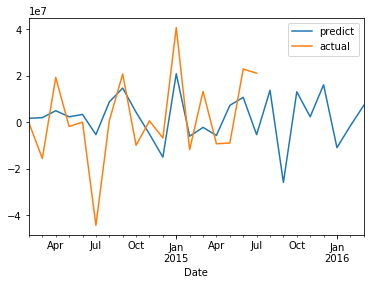

In [34]:
predict.plot(label='predict')
ts.plot(label='actual')
plt.legend();

In [35]:
ts

Date
2014-02-28     -230178.0
2014-03-31   -15550917.0
2014-04-30    19274060.0
2014-05-31    -1831351.0
2014-06-30       62506.0
2014-07-31   -44295875.0
2014-08-31      656923.0
2014-09-30    20756457.0
2014-10-31    -9908137.0
2014-11-30      602961.0
2014-12-31    -6746998.0
2015-01-31    40680912.0
2015-02-28   -11740162.0
2015-03-31    13261048.0
2015-04-30    -9237920.0
2015-05-31    -8923269.0
2015-06-30    22865682.0
2015-07-31    21113587.0
Freq: M, Name: Sales, dtype: float64

In [36]:
type(sales_m)
type(sales_m['Sales'])

pandas.core.series.Series